In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,1.71,2.43,15.6,127.0,2.80,3.06,NaN,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,NaN,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,NaN,1.06,7.70,0.64,1.74,740.0
174,13.40,NaN,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,NaN,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	8
float64		column 3	0
float64		column 4	7
float64		column 5	14
float64		column 6	7
float64		column 7	0
float64		column 8	21
float64		column 9	7
float64		column 10	14
float64		column 11	0
float64		column 12	8
float64		column 13	15


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,171.000000,170.000000,178.000000,171.000000,164.000000,171.000000,178.000000,157.000000,171.000000,164.000000,178.000000,170.000000,163.000000
mean,13.007719,2.302588,2.366517,19.571345,99.170732,2.308187,2.029270,0.359108,1.575731,5.026707,0.957449,2.620412,744.490798
std,0.807658,1.088438,0.274344,3.313812,13.979218,0.618933,0.998859,0.120540,0.547441,2.272730,0.228572,0.696325,310.587424
min,11.030000,0.740000,1.360000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.610000,2.210000,17.300000,88.000000,1.785000,1.205000,0.270000,1.250000,3.240000,0.782500,2.002500,510.000000
50%,13.050000,1.845000,2.360000,19.500000,97.000000,2.400000,2.135000,0.340000,1.550000,4.690000,0.965000,2.780000,675.000000
75%,13.675000,2.982500,2.557500,21.500000,106.250000,2.800000,2.875000,0.430000,1.935000,6.147500,1.120000,3.170000,953.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.630000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

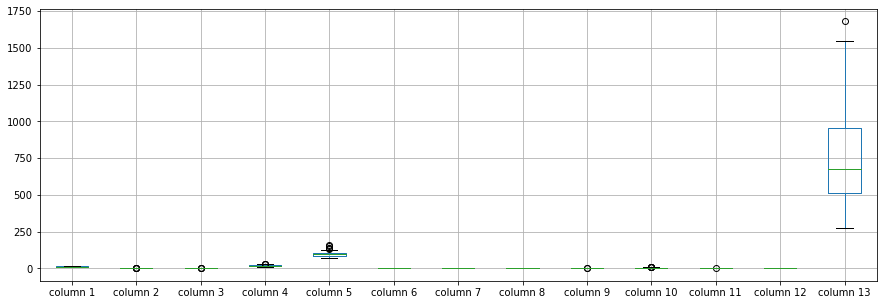

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.007719
column 2       2.302588
column 3       2.366517
column 4      19.571345
column 5      99.170732
column 6       2.308187
column 7       2.029270
column 8       0.359108
column 9       1.575731
column 10      5.026707
column 11      0.957449
column 12      2.620412
column 13    744.490798
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.063279,0.205264,-0.321105,0.237221,0.260915,0.227241,-0.127918,0.127331,0.537718,-0.089614,0.084152,0.636034
column 2,0.063279,1.000000,0.154498,0.265637,-0.055315,-0.365629,-0.430764,0.301902,-0.193112,0.208233,-0.545642,-0.401883,-0.200573
column 3,0.205264,0.154498,1.000000,0.432904,0.204043,0.143463,0.115077,0.162228,0.022172,0.242355,-0.074667,-0.019304,0.240800
column 4,-0.321105,0.265637,0.432904,1.000000,-0.167907,-0.334077,-0.378735,0.305216,-0.159544,-0.027965,-0.265525,-0.317154,-0.428034
column 5,0.237221,-0.055315,0.204043,-0.167907,1.000000,0.222947,0.169994,-0.289684,0.241173,0.220406,0.047965,0.057498,0.419168
column 6,0.260915,-0.365629,0.143463,-0.334077,0.222947,1.000000,0.864818,-0.470191,0.584397,-0.017735,0.434201,0.683022,0.472847
column 7,0.227241,-0.430764,0.115077,-0.378735,0.169994,0.864818,1.000000,-0.525687,0.639551,-0.134899,0.543479,0.780509,0.483185
column 8,-0.127918,0.301902,0.162228,0.305216,-0.289684,-0.470191,-0.525687,1.000000,-0.381704,0.137735,-0.285583,-0.500019,-0.293520
column 9,0.127331,-0.193112,0.022172,-0.159544,0.241173,0.584397,0.639551,-0.381704,1.000000,-0.025537,0.252609,0.490640,0.269787
column 10,0.537718,0.208233,0.242355,-0.027965,0.220406,-0.017735,-0.134899,0.137735,-0.025537,1.000000,-0.495569,-0.385797,0.341243


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+24,13+24+24,13+24+24,13+24+24+24+24,13+24+24+24+24+24,13+24+24+24+24+24+24,13+24+24+24+24+24,13+24+24+24+24,13+24+24+24,13+24+24,13+24,13], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 879.2860773259944
Epoch: 1 , loss: 879.3052090731534
Epoch: 2 , loss: 874.7336869673295
Epoch: 3 , loss: 878.8708274147727
Epoch: 4 , loss: 877.0453602183949
Epoch: 5 , loss: 883.2300248579545
Epoch: 6 , loss: 870.78955078125
Epoch: 7 , loss: 875.6331842595881
Epoch: 8 , loss: 881.5653409090909
Epoch: 9 , loss: 877.1757479580966
Epoch: 10 , loss: 877.3483775745739
Epoch: 11 , loss: 878.6874278675426
Epoch: 12 , loss: 874.5481178977273
Epoch: 13 , loss: 882.2794133966619
Epoch: 14 , loss: 883.644325949929
Epoch: 15 , loss: 877.8446377840909
Epoch: 16 , loss: 880.4042136452415
Epoch: 17 , loss: 881.7137950550426
Epoch: 18 , loss: 881.0764825994319
Epoch: 19 , loss: 879.556230024858
Epoch: 20 , loss: 884.0689974698154
Epoch: 21 , loss: 875.5146539861506
Epoch: 22 , loss: 878.9796752929688
Epoch: 23 , loss: 880.1746715198864
Epoch: 24 , loss: 874.3534490411931
Epoch: 25 , loss: 877.4694602272727
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.930000
column 2       3.800000
column 3       2.650000
column 4      18.600000
column 5     102.000000
column 6       2.410000
column 7       2.410000
column 8       0.262608
column 9       1.980000
column 10      4.500000
column 11      1.030000
column 12      3.520000
column 13    770.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,-1.597776,0.000000,0.0,0.0,0.0,0.0,0.0,0.021998,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.021176,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.163769,0.0,0.0,0.0,0.000000,0.0
174,0.000000,-2.622051,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.028555,0.0
175,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
176,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3253.2907050626745, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.298519674355795

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.010000
column 3       1.700000
column 4      15.000000
column 5      31.047132
column 6       2.980000
column 7       3.180000
column 8       0.260000
column 9       2.280000
column 10      5.300000
column 11      1.120000
column 12      3.180000
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,12.632224,1.710000,2.43,15.6,127.0,2.80,3.06,0.301998,2.29,5.64,1.04,3.920000,1065.0
1,13.200000,1.780000,2.14,11.2,100.0,2.65,2.76,0.260000,1.28,4.38,1.05,3.400000,1050.0
2,13.160000,2.360000,2.67,18.6,101.0,2.80,3.24,0.300000,2.81,5.68,1.03,3.170000,1185.0
3,14.370000,1.950000,2.50,16.8,113.0,3.85,3.49,0.240000,2.18,7.80,0.86,3.450000,1480.0
4,13.240000,2.590000,2.87,21.0,118.0,2.80,2.69,0.368824,1.82,4.32,1.04,2.930000,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.45,20.5,95.0,1.68,0.61,0.683769,1.06,7.70,0.64,1.740000,740.0
174,13.400000,1.287949,2.48,23.0,102.0,1.80,0.75,0.430000,1.41,7.30,0.70,1.588555,750.0
175,13.270000,4.280000,2.26,20.0,120.0,1.59,0.69,0.430000,1.35,10.20,0.59,1.560000,835.0
176,13.170000,2.590000,2.37,20.0,120.0,1.65,0.68,0.530000,1.46,9.30,0.60,1.620000,840.0


In [20]:
imputations[-1].to_excel("Wine_NN_5(imp).xlsx", index=False, header=False)